In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def plot_pair_original(img1,img2,cmap1=None,cmap2=None) :
    f,ax = plt.subplots(1,2)
    ax[0].imshow(img1,cmap=cmap1)
    ax[0].set_title('Color Image (original)')
    ax[1].imshow(img2,cmap=cmap2)
    ax[1].set_title('Black and White Image (Original)')

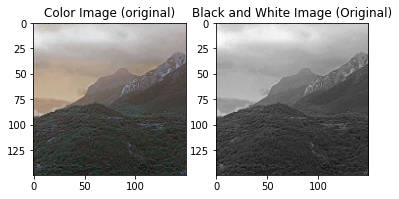

In [ ]:
c1 = cv2.imread('/content/drive/My Drive/landscape/landscapeimages/color/1000.jpg')
g1 = cv2.imread('/content/drive/My Drive/landscape/landscapeimages/gray/1000.jpg',0)
plot_pair_original(c1,g1,cmap2='gray')

In [ ]:
def load_data(path1,path2) :
    X = []
    y = []
    
    l1 = sorted(os.listdir(path1))
    for i in range(5,len(l1)//2):
        img = cv2.imread(path1+l1[i],0)
        if (img.shape[0] != 150) or (img.shape[1] != 150) :
            continue
        img = img / 255
        X.append(img)
    img = cv2.imread(path1+l1[i],0)
    X.append(img)
    X.append(img)
    l2 = sorted(os.listdir(path2))
    for i in range(5,len(l2)//2):
        img = cv2.imread(path2+l2[i])
        if (img.shape[0] != 150) or (img.shape[1] != 150) :
            continue
        img = img / 255
        y.append(img)
        
    return np.asarray(X),np.asarray(y)

In [ ]:
X,y = load_data('/content/drive/My Drive/landscape/landscapeimages/gray/','/content/drive/My Drive/landscape/landscapeimages/color/')

In [ ]:
X.shape,y.shape


((3548, 150, 150), (3548, 150, 150, 3))

In [ ]:
X = X.reshape(3548,150,150,1)


In [ ]:
def model1() :
    inp = tf.keras.layers.Input(shape=(150,150,1))
    conv1 = tf.keras.layers.Conv2D(16,3,padding='same',activation='relu') (inp)
    conv2 = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu') (conv1)
    conv3 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu') (conv2)
    conv4 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu') (conv3)
    convt1 = tf.keras.layers.Conv2DTranspose(128,3,padding='same',activation='relu') (conv4)
    convt2 = tf.keras.layers.Conv2DTranspose(64,3,padding='same',activation='relu') (convt1)
    convt3 = tf.keras.layers.Conv2DTranspose(32,3,padding='same',activation='relu') (convt2)
    convt4 = tf.keras.layers.Conv2DTranspose(16,3,padding='same',activation='relu') (convt3)
    out = tf.keras.layers.Conv2DTranspose(3,3,padding='same',activation='sigmoid') (convt4)
    
    model = tf.keras.models.Model(inp,out)
    model.summary()
    return model

model1 = model1()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 150, 150, 128)    147584    
 nspose)                                                         
                                                             

In [ ]:
def loss(y_true,y_pred) :
    l = tf.sqrt(tf.reduce_mean(tf.square(tf.abs(y_true - y_pred))))
    return l

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0001)
model1.compile(optimizer=optimizer,loss=loss)

In [ ]:
hist = model1.fit(X,y,epochs=10,batch_size=32)


Epoch 1/10
111/111 [==============================] - 54s 373ms/step - loss: 0.1910
Epoch 2/10
111/111 [==============================] - 39s 348ms/step - loss: 0.1457
Epoch 3/10
111/111 [==============================] - 38s 345ms/step - loss: 0.1362
Epoch 4/10
111/111 [==============================] - 38s 347ms/step - loss: 0.1278
Epoch 5/10
111/111 [==============================] - 38s 346ms/step - loss: 0.1211
Epoch 6/10
111/111 [==============================] - 38s 346ms/step - loss: 0.1151
Epoch 7/10
111/111 [==============================] - 38s 346ms/step - loss: 0.1092
Epoch 8/10
111/111 [==============================] - 38s 346ms/step - loss: 0.1046
Epoch 9/10
111/111 [==============================] - 38s 346ms/step - loss: 0.1006
Epoch 10/10
111/111 [==============================] - 38s 346ms/step - loss: 0.0973


In [ ]:
img = cv2.imread('/content/drive/My Drive/landscape/landscapeimages/gray/1159.jpg',0)
img = img / 255
img.shape

(150, 150)

In [ ]:
pred = model1.predict(img.reshape(1,150,150,1))
pred.shape

1/1 [==============================] - 1s 537ms/step


(1, 150, 150, 3)

In [ ]:
pred = pred.reshape(150,150,3)


In [ ]:
def plot_pair_pred(img1,img2,cmap1=None,cmap2=None) :
    f,ax = plt.subplots(1,2)
    ax[0].imshow(img1,cmap=cmap1)
    ax[0].set_title('Color Image (predicted)')
    ax[1].imshow(img2,cmap=cmap2)
    ax[1].set_title('Black and White Image (Original)')

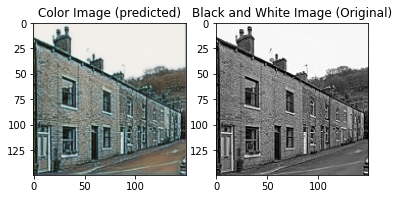

In [ ]:
plot_pair_pred(pred,img,cmap2='gray')


In [ ]:
def predict(img_path) :
    img = cv2.imread(img_path,0)
    img = cv2.resize(img,(150,150))
    img = img / 255
    pred = model1.predict(img.reshape(1,150,150,1))
    pred = pred.reshape(150,150,3)
    plot_pair_pred(pred,img,cmap2='gray')

1/1 [==============================] - 0s 18ms/step


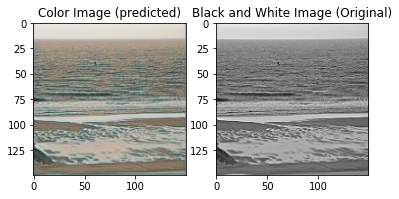

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/1160.jpg')

1/1 [==============================] - 0s 17ms/step


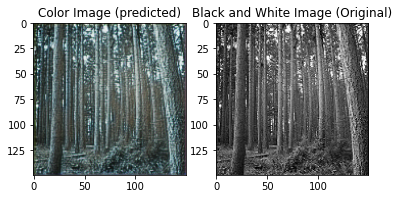

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/2009.jpg')

1/1 [==============================] - 0s 15ms/step


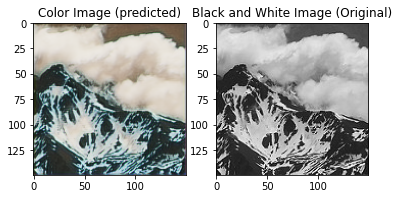

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/1999.jpg')

1/1 [==============================] - 0s 15ms/step


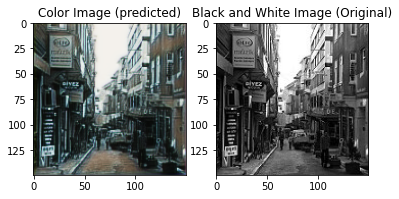

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/155.jpg')

1/1 [==============================] - 0s 16ms/step


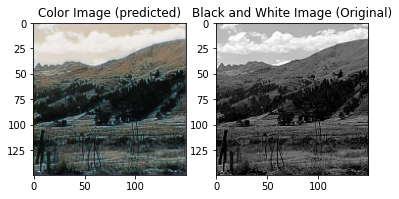

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/639.jpg')

1/1 [==============================] - 0s 15ms/step


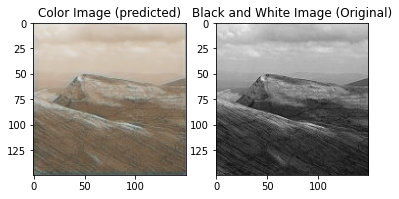

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/3214.jpg')

1/1 [==============================] - 0s 15ms/step


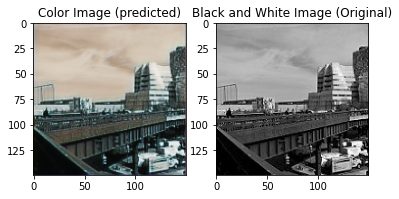

In [ ]:
predict('/content/drive/My Drive/landscape/landscapeimages/gray/5445.jpg')